In [906]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import feather 

In [907]:
import warnings
warnings.filterwarnings('ignore')

In [908]:
df = feather.read_dataframe("f_data_sm.feather") # reading .rda as DataFrame

In [909]:
df.head() #head of DataFrame

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A
0,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Arsenal,Coventry,0-3,A,0.0,3.0,3.0,NaN,NaN,NaN
1,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Aston Villa,QPR,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN
2,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Chelsea,Blackburn,1-2,A,1.0,2.0,3.0,NaN,NaN,NaN
3,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Liverpool,Sheffield Weds,2-0,H,2.0,0.0,2.0,NaN,NaN,NaN
4,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Man City,Leeds,1-1,D,1.0,1.0,2.0,NaN,NaN,NaN


In [910]:
my_league = df[(df["LEAGUE"]=="Premier League")]

In [911]:
len(df)

87816

In [912]:
len(my_league)

15456

In [913]:
my_league.isnull().sum()

SEASON         0
COUNTRY        0
LEAGUE         0
DATE           0
HOMETEAM       0
AWAYTEAM       0
FTSC           0
FTR            0
FTHG           0
FTAG           0
FTTG           0
H           5122
D           5122
A           5122
dtype: int64

In [914]:
my_league["SEASON"].unique()

array([1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.])

In [915]:
my_league["HOMETEAM"].nunique() == my_league["AWAYTEAM"].nunique()

True

In [916]:
teams = my_league["HOMETEAM"].unique()
teams

array(['Arsenal', 'Aston Villa', 'Chelsea', 'Liverpool', 'Man City',
       'Newcastle', 'Oldham', 'Sheffield United', 'Southampton',
       'West Ham', 'Norwich', 'Tottenham', 'Everton', 'Ipswich', 'Leeds',
       'Wimbledon', 'Blackburn', 'Coventry', 'Man United', 'QPR',
       'Sheffield Weds', 'Swindon', 'Crystal Palace', 'Leicester',
       "Nott'm Forest", 'Aberdeen', 'Falkirk', 'Hibernian', 'Partick',
       'Rangers', 'Celtic', 'Motherwell', 'Dundee United', 'Hearts',
       'Kilmarnock', 'Bolton', 'Middlesbrough', 'Raith Rvs', 'Derby',
       'Middlesboro', 'Sunderland', 'Dunfermline', 'Barnsley',
       'St Johnstone', 'Charlton', 'Dundee', 'Watford', 'Bradford',
       'St Mirren', 'Fulham', 'Livingston', 'Birmingham', 'West Brom',
       'Portsmouth', 'Wolves', 'Inverness C', 'Wigan', 'Reading',
       'Gretna', 'Hull', 'Stoke', 'Hamilton', 'Burnley', 'Blackpool',
       'Swansea', 'Ross County', 'Cardiff', 'Bournemouth', 'Brighton',
       'Huddersfield'], dtype=object)

###   Calculate average number of goals for home and away teams per SEASON for that league and sort them descending order,Which clubs are more consistent ?



In [917]:
my_league.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A
0,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Arsenal,Coventry,0-3,A,0.0,3.0,3.0,NaN,NaN,NaN
1,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Aston Villa,QPR,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN
2,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Chelsea,Blackburn,1-2,A,1.0,2.0,3.0,NaN,NaN,NaN
3,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Liverpool,Sheffield Weds,2-0,H,2.0,0.0,2.0,NaN,NaN,NaN
4,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Man City,Leeds,1-1,D,1.0,1.0,2.0,NaN,NaN,NaN


In [918]:
seasons = my_league["SEASON"].unique()

In [919]:
avr_season_hg = []
avr_season_ag = []
my_league1994 = my_league[(my_league["SEASON"] == 1994.0)]

In [920]:
avr_1994 = my_league1994["FTHG"].mean()

In [921]:
for i in range(len(seasons)):
    season = my_league[(my_league["SEASON"] == seasons[i])]
    avr_hg = season["FTHG"].mean()
    avr_season_hg.append(round(avr_hg,2))
    avr_ag = season["FTAG"].mean()
    avr_season_ag.append(round(avr_ag,2))

In [922]:
for i in range (len(seasons)):
    print("average number of goals for home and away teams per SEASON",
          int(seasons[i]),":",avr_season_hg[i],",",avr_season_ag[i])

average number of goals for home and away teams per SEASON 1994 : 1.44 , 1.15
average number of goals for home and away teams per SEASON 1995 : 1.5 , 1.07
average number of goals for home and away teams per SEASON 1996 : 1.51 , 1.1
average number of goals for home and away teams per SEASON 1997 : 1.51 , 1.12
average number of goals for home and away teams per SEASON 1998 : 1.57 , 1.14
average number of goals for home and away teams per SEASON 1999 : 1.43 , 1.12
average number of goals for home and away teams per SEASON 2000 : 1.65 , 1.19
average number of goals for home and away teams per SEASON 2001 : 1.53 , 1.1
average number of goals for home and away teams per SEASON 2002 : 1.48 , 1.18
average number of goals for home and away teams per SEASON 2003 : 1.56 , 1.19
average number of goals for home and away teams per SEASON 2004 : 1.54 , 1.16
average number of goals for home and away teams per SEASON 2005 : 1.5 , 1.09
average number of goals for home and away teams per SEASON 2006 : 1.

In [923]:
my_league["avr_shg"] = 0
my_league["avr_sag"] = 0
my_league["avr_sg"] = 0
for i in range (len(seasons)):
    my_league["avr_shg"].loc[(my_league["SEASON"] == seasons[i])] = avr_season_hg[i]
    my_league["avr_sag"].loc[(my_league["SEASON"] == seasons[i])] = avr_season_ag[i]
    my_league["avr_sg"].loc[(my_league["SEASON"] == seasons[i])] = avr_season_ag[i]+avr_season_hg[i]

In [924]:
my_league.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A,avr_shg,avr_sag,avr_sg
0,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Arsenal,Coventry,0-3,A,0.0,3.0,3.0,NaN,NaN,NaN,1.44,1.15,2.59
1,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Aston Villa,QPR,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN,1.44,1.15,2.59
2,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Chelsea,Blackburn,1-2,A,1.0,2.0,3.0,NaN,NaN,NaN,1.44,1.15,2.59
3,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Liverpool,Sheffield Weds,2-0,H,2.0,0.0,2.0,NaN,NaN,NaN,1.44,1.15,2.59
4,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Man City,Leeds,1-1,D,1.0,1.0,2.0,NaN,NaN,NaN,1.44,1.15,2.59


In [925]:
my_league.groupby(["avr_sag"]).min().head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A,avr_shg,avr_sg
avr_sag,,,,,,,,,,,,,,,,
1.04,2007.0,England,Premier League,2006-07-29 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.12,2.5,1.22,1.41,2.45
1.07,1995.0,England,Premier League,1994-08-13 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,NaN,NaN,NaN,1.50,2.57
1.08,2009.0,England,Premier League,2008-08-09 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.14,3.0,1.29,1.37,2.45
1.09,2005.0,England,Premier League,2004-08-07 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.10,3.0,1.16,1.50,2.59
1.10,1996.0,England,Premier League,1995-08-19 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,NaN,NaN,NaN,1.51,2.61


In [926]:
my_league.groupby(["avr_shg"]).min().head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A,avr_sag,avr_sg
avr_shg,,,,,,,,,,,,,,,,
1.37,2009.0,England,Premier League,2008-08-09 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.14,3.0,1.29,1.08,2.45
1.41,2007.0,England,Premier League,2006-07-29 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.12,2.5,1.22,1.04,2.45
1.43,1999.0,England,Premier League,1998-08-01 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,NaN,NaN,NaN,1.12,2.55
1.44,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Arsenal,Arsenal,0-0,A,0.0,0.0,0.0,NaN,NaN,NaN,1.15,2.59
1.46,2015.0,England,Premier League,2014-08-09 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.13,3.1,1.18,1.11,2.57


In [927]:
my_league.groupby(["avr_sg"]).min()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A,avr_shg,avr_sag
avr_sg,,,,,,,,,,,,,,,,
2.45,2007.0,England,Premier League,2006-07-29 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.120,2.500,1.220,1.37,1.04
2.55,1999.0,England,Premier League,1998-08-01 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,NaN,NaN,NaN,1.43,1.12
2.57,1995.0,England,Premier League,1994-08-13 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.130,3.100,1.180,1.46,1.07
2.59,1994.0,England,Premier League,1993-08-14 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.100,3.000,1.160,1.44,1.09
2.61,1996.0,England,Premier League,1995-08-19 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.100,3.000,1.140,1.50,1.10
2.63,1997.0,England,Premier League,1996-08-10 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,NaN,NaN,NaN,1.51,1.10
2.65,2018.0,England,Premier League,2017-08-05 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.080,3.000,1.160,1.48,1.17
2.65,2008.0,England,Premier League,2007-08-04 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,1.100,3.000,1.100,1.54,1.11
2.66,2002.0,England,Premier League,2001-07-28 00:00:00+00:00,Aberdeen,Aberdeen,0-0,A,0.0,0.0,0.0,NaN,NaN,NaN,1.48,1.18


### Construct a plot  to show how this number is changing over time. 


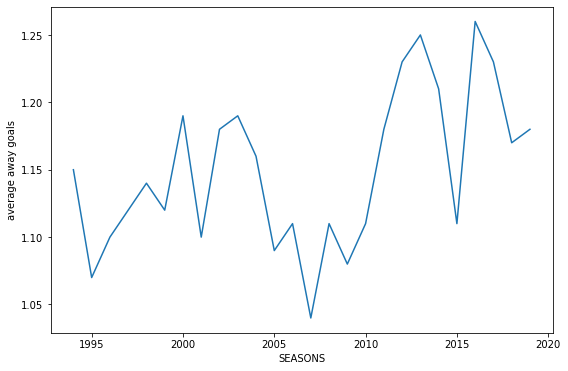

In [928]:
fig = plt.figure(figsize = (9,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("SEASONS")
ax.set_ylabel("average away goals")
plt.plot(seasons,avr_season_ag)
plt.show()

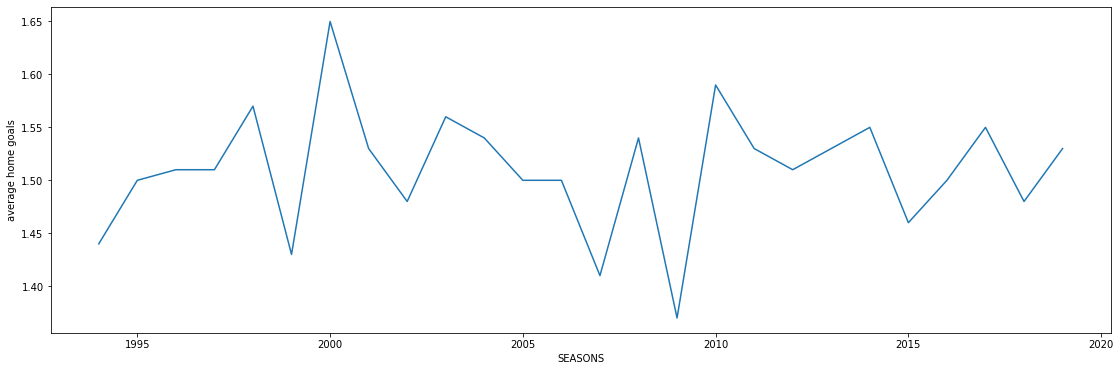

In [929]:
fig = plt.figure(figsize = (19,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("SEASONS")
ax.set_ylabel("average home goals")
plt.plot(seasons,avr_season_hg)
plt.show()

### . Find following clubs for each season:
- the best attack (top 5)
- the best defense (top5)

In [1015]:
attack_top =[]
da_list = []
defense_top = []
df_list = []
teams_top = []

In [1016]:
for i in range(len(seasons)):
    for j in range(len(teams)):
        
        season = my_league[(my_league["SEASON"] == seasons[i])]
        season_team_h = season[(season["HOMETEAM"] == teams[j])]
        team_avr_hg = season_team_h["FTHG"].mean()
        d_team_avr_hg = season_team_h["FTAG"].mean()
        season_team_a = season[(season["AWAYTEAM"] == teams[j])]
        team_avr_ag = season_team_a["FTAG"].mean()
        d_team_avr_ag = season_team_a["FTHG"].mean()
        team_avr = team_avr_ag + team_avr_hg
        d_team_avr = d_team_avr_ag + d_team_avr_hg
        
        attack_top.append(team_avr)
        defense_top.append(d_team_avr)
        teams_top.append(teams[j])
                   
        if j == len(teams) -1:
            d_a = {"Team": teams_top,"avr_goal_sum": attack_top}
            df_a = pd.DataFrame(data = d_a) 
            df_a = df.groupby(by = "avr_goal_sum").min()[::-1]
            da_list.append(df_a)             
            d_f = {"Team": teams_top,"avr_goal_sum": defense_top}
            df_f = pd.DataFrame(data = d_f) 
            df_f = df_f.groupby(by = "avr_goal_sum").min()
            df_list.append(df_f)
            attack_top.clear()
            defense_top.clear()
            teams_top.clear()   
        else:
            continue 

In [1017]:
def top5_attack_teams (season):
    a = seasons.tolist()
    a = list(a)
    index = a.index(float(season))
    return da_list[index].head()            

In [1021]:
def top5_defence_teams (season):
    a = seasons.tolist()
    a = list(a)
    index = a.index(float(season))
    return df_list[index].head()

In [1028]:
top5_defence_teams(2012)

,Team
avr_goal_sum,
1.105263,Celtic
1.473684,Rangers
1.526316,Man City
1.736842,Man United
2.105263,Liverpool


In [1029]:
top5_attack_teams(2012)

,Team
avr_goal_sum,
5.000000,Man City
4.684211,Liverpool
4.315789,Rangers
4.052632,Celtic
3.842105,Arsenal
